In [19]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.spatial import distance

#getting  a dataset from google drive link 
#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
#transferring a dataset to a new data frame
df20 = pd.read_csv(url2020)
df21 = pd.read_csv(url2021)
#Dropping unimportant columns and rows of nan
data21 = df21.drop(['country_region_code','country_region','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id','date'],axis=1)
data21 = data21.dropna()
data20 = df20.drop(['country_region_code','country_region','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id','date'],axis=1)
data20 = data20.dropna()
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
data21.info()
data20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57826 entries, 278 to 157378
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   sub_region_1                                        57826 non-null  object 
 1   retail_and_recreation_percent_change_from_baseline  57826 non-null  float64
 2   grocery_and_pharmacy_percent_change_from_baseline   57826 non-null  float64
 3   parks_percent_change_from_baseline                  57826 non-null  float64
 4   transit_stations_percent_change_from_baseline       57826 non-null  float64
 5   workplaces_percent_change_from_baseline             57826 non-null  float64
 6   residential_percent_change_from_baseline            57826 non-null  float64
dtypes: float64(6), object(1)
memory usage: 3.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62077 entries, 321 to 166652
Data columns (total 7 columns

In [20]:
# to create training dataset without using group by or taking mean 
Y_train= data21['sub_region_1']
X_train= data21.drop(['sub_region_1'] ,axis = 1)

In [21]:
# taking samples from main dataset
sample = data21.groupby('sub_region_1').sample(n=10, replace=True)
data21 = data21.drop(sample.index)
sample

,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1082,Adana,20.0,48.0,33.0,9.0,-24.0,-2.0
448,Adana,-63.0,-28.0,-45.0,-45.0,-27.0,10.0
687,Adana,-37.0,19.0,3.0,-59.0,-54.0,17.0
755,Adana,93.0,112.0,87.0,29.0,-46.0,-2.0
606,Adana,-72.0,-58.0,-29.0,-70.0,-41.0,19.0
...,...,...,...,...,...,...,...
135009,Şanlıurfa,-1.0,50.0,-4.0,-13.0,12.0,4.0
137061,Şanlıurfa,26.0,89.0,-8.0,78.0,-7.0,1.0
136710,Şanlıurfa,-37.0,10.0,-2.0,-79.0,-71.0,27.0
136838,Şanlıurfa,29.0,71.0,28.0,9.0,14.0,0.0


In [22]:
#making test data by using sample data frame
testData = pd.DataFrame(sample, columns=sample.columns)
testData

Y_test = testData['sub_region_1']
X_test = testData.drop(['sub_region_1'] , axis = 1)

In [5]:
#to mix dataset 20 and dataset 21
df21= df21.append(df20)
df = df21.drop(['country_region_code','country_region','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id','date'],axis=1)
#finding all nan values at main dataframe and transfer it to new dataframe 
nanData = pd.DataFrame()
undefined = []
nanData = df[df['sub_region_1'].isnull()]
nanData['sub_region_1'] = nanData['sub_region_1'].fillna('undefined')
nanData = nanData.dropna()
nanData

C:\Users\HP\anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,undefined,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,undefined,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,undefined,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,undefined,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,undefined,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...
316,undefined,-85.0,-58.0,-69.0,-75.0,-50.0,22.0
317,undefined,-32.0,20.0,-7.0,-20.0,-22.0,9.0
318,undefined,-33.0,21.0,-2.0,-19.0,-23.0,10.0
319,undefined,-33.0,29.0,0.0,-19.0,-22.0,10.0


Text(0, 0.5, 'Accuracy')

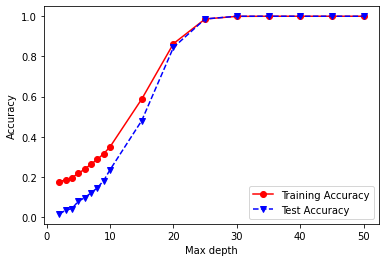

In [16]:
            ################  Decision Tree Classifier #######################
from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths =[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [17]:

from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=18)
clf = clf.fit(X_train, Y_train)

predY = clf.predict(X_test)

testData['Predicted Class'] = predY
testData['sub_region_1'] = Y_test
testData


from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, predY)))

Accuracy on test data is 0.92


In [18]:
# to make prediction test 
Y_test = nanData['sub_region_1']
X_test = nanData.drop(['sub_region_1'],axis = 1)

predY = clf.predict(X_test)

nanData['sub_region_1'] = predY
nanData

,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,İstanbul,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,İstanbul,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,İstanbul,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,Hatay,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,Ankara,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...
316,Ordu,-85.0,-58.0,-69.0,-75.0,-50.0,22.0
317,Çanakkale,-32.0,20.0,-7.0,-20.0,-22.0,9.0
318,Çanakkale,-33.0,21.0,-2.0,-19.0,-23.0,10.0
319,Çanakkale,-33.0,29.0,0.0,-19.0,-22.0,10.0


Text(0, 0.5, 'Accuracy')

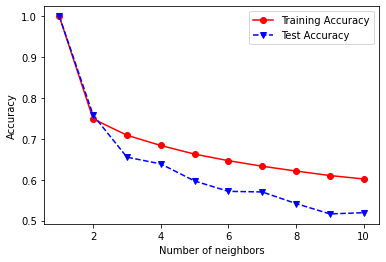

In [23]:
                    ################### K-Nearest neighbor classifier ######################
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1,2,3,4, 5,6,7,8,9, 10]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [59]:
# to make prediction test 
Y_test = nanData['sub_region_1']
X_test = nanData.drop(['sub_region_1'],axis = 1)

predY = clf.predict(X_test)

nanData['sub_region_1'] = predY
nanData

,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Ankara,2.0,3.0,-11.0,-4.0,7.0,1.0
1,İzmir,7.0,6.0,14.0,2.0,5.0,0.0
2,Kırklareli,6.0,5.0,10.0,5.0,8.0,-2.0
3,Kırklareli,4.0,6.0,11.0,4.0,8.0,-2.0
4,Bursa,0.0,3.0,6.0,0.0,9.0,-2.0
...,...,...,...,...,...,...,...
316,Antalya,-85.0,-58.0,-69.0,-75.0,-50.0,22.0
317,İzmir,-32.0,20.0,-7.0,-20.0,-22.0,9.0
318,Ankara,-33.0,21.0,-2.0,-19.0,-23.0,10.0
319,Aydın,-33.0,29.0,0.0,-19.0,-22.0,10.0


Accuracy on test data is 1.00


Text(0, 0.5, 'Accuracy')

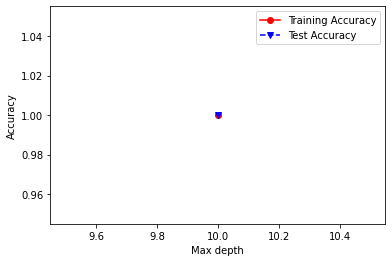

In [6]:
             ################ Ensemble Methods RandomForestClassifier ###################
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

numBaseClassifiers = 500
maxdepth = 10

trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, Y_predTest)))

plt.plot(maxdepth,trainAcc,'ro-',maxdepth,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')


In [7]:
# to make prediction test 
Y_test = nanData['sub_region_1']
X_test = nanData.drop(['sub_region_1'],axis = 1)

predY = clf.predict(X_test)

nanData['sub_region_1'] = predY
nanData

,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,İstanbul,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,İstanbul,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,Balıkesir,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,İstanbul,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,Ankara,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...
316,Balıkesir,-85.0,-58.0,-69.0,-75.0,-50.0,22.0
317,İzmir,-32.0,20.0,-7.0,-20.0,-22.0,9.0
318,Ankara,-33.0,21.0,-2.0,-19.0,-23.0,10.0
319,Çanakkale,-33.0,29.0,0.0,-19.0,-22.0,10.0
